In [4]:
!apt-get install -y openslide-tools
!pip install openslide-python

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libopenslide0
Suggested packages:
  libtiff-tools
The following NEW packages will be installed:
  libopenslide0 openslide-tools
0 upgraded, 2 newly installed, 0 to remove and 49 not upgraded.
Need to get 104 kB of archives.
After this operation, 297 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libopenslide0 amd64 3.4.1+dfsg-5build1 [89.8 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 openslide-tools amd64 3.4.1+dfsg-5build1 [13.8 kB]
Fetched 104 kB in 1s (110 kB/s)
Selecting previously unselected package libopenslide0.
(Reading database ... 123623 files and directories currently installed.)
Preparing to unpack .../libopenslide0_3.4.1+dfsg-5build1_amd64.deb ...
Unpacking libopenslide0 (3.4.1+dfsg-5build1) ...
Selecting previously unselected package openslide-tools.

In [18]:
from openslide import open_slide
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import tifffile as tiff
import cv2
import glob
import os
import imageio

In [8]:
slide = open_slide("/content/wsi_img.svs")

In [10]:
level = 2  #Use 0, was used to load faster
slide_dimensions = slide.level_dimensions[level]
slide_region = slide.read_region((0, 0), level, slide_dimensions)

In [11]:
wsi_img = np.array(slide_region)
wsi_img.shape

(2119, 1750, 4)

In [12]:
wsi_img_resized = cv2.resize(wsi_img, (1500, 1500)) #Use 14k, was set to 1500 for faster loading

If You want to Remove the Alpha Channel from the WSI Image then RUN the Blow Cell If not Ignore.

In [13]:
wsi_img_rgb = wsi_img_resized[:, :, :3]
wsi_img_rgb.shape #removed Alpha Channel

(1500, 1500, 3)

In [14]:
wsi_img_gray = cv2.cvtColor(wsi_img_rgb, cv2.COLOR_RGB2GRAY) # Convert to gray just for seeing it
wsi_img_gray.shape

(1500, 1500)

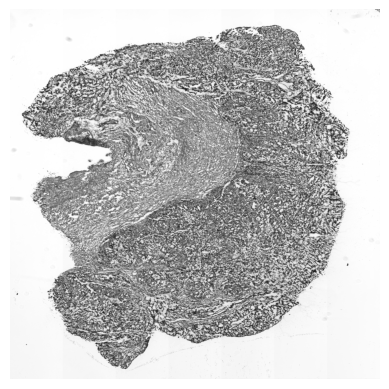

In [15]:
plt.axis('off')
plt.imshow(wsi_img_gray, cmap="gray")
plt.show()

In [21]:
tile_size = 256 #AS the image was size was reduced, 256 x 256 was used. When level is set to 0 with resizing 14k x 14k set this to 1000
tiles = []
#If dont want to keep alpha channel then use 'wsi_img_rgb' instead of 'wsi_img_resized'
for y in range(0, wsi_img_resized.shape[0], tile_size):
    for x in range(0, wsi_img_resized.shape[1], tile_size):
        tile = wsi_img_resized[y:y + tile_size, x:x + tile_size]
        tiles.append(tile)

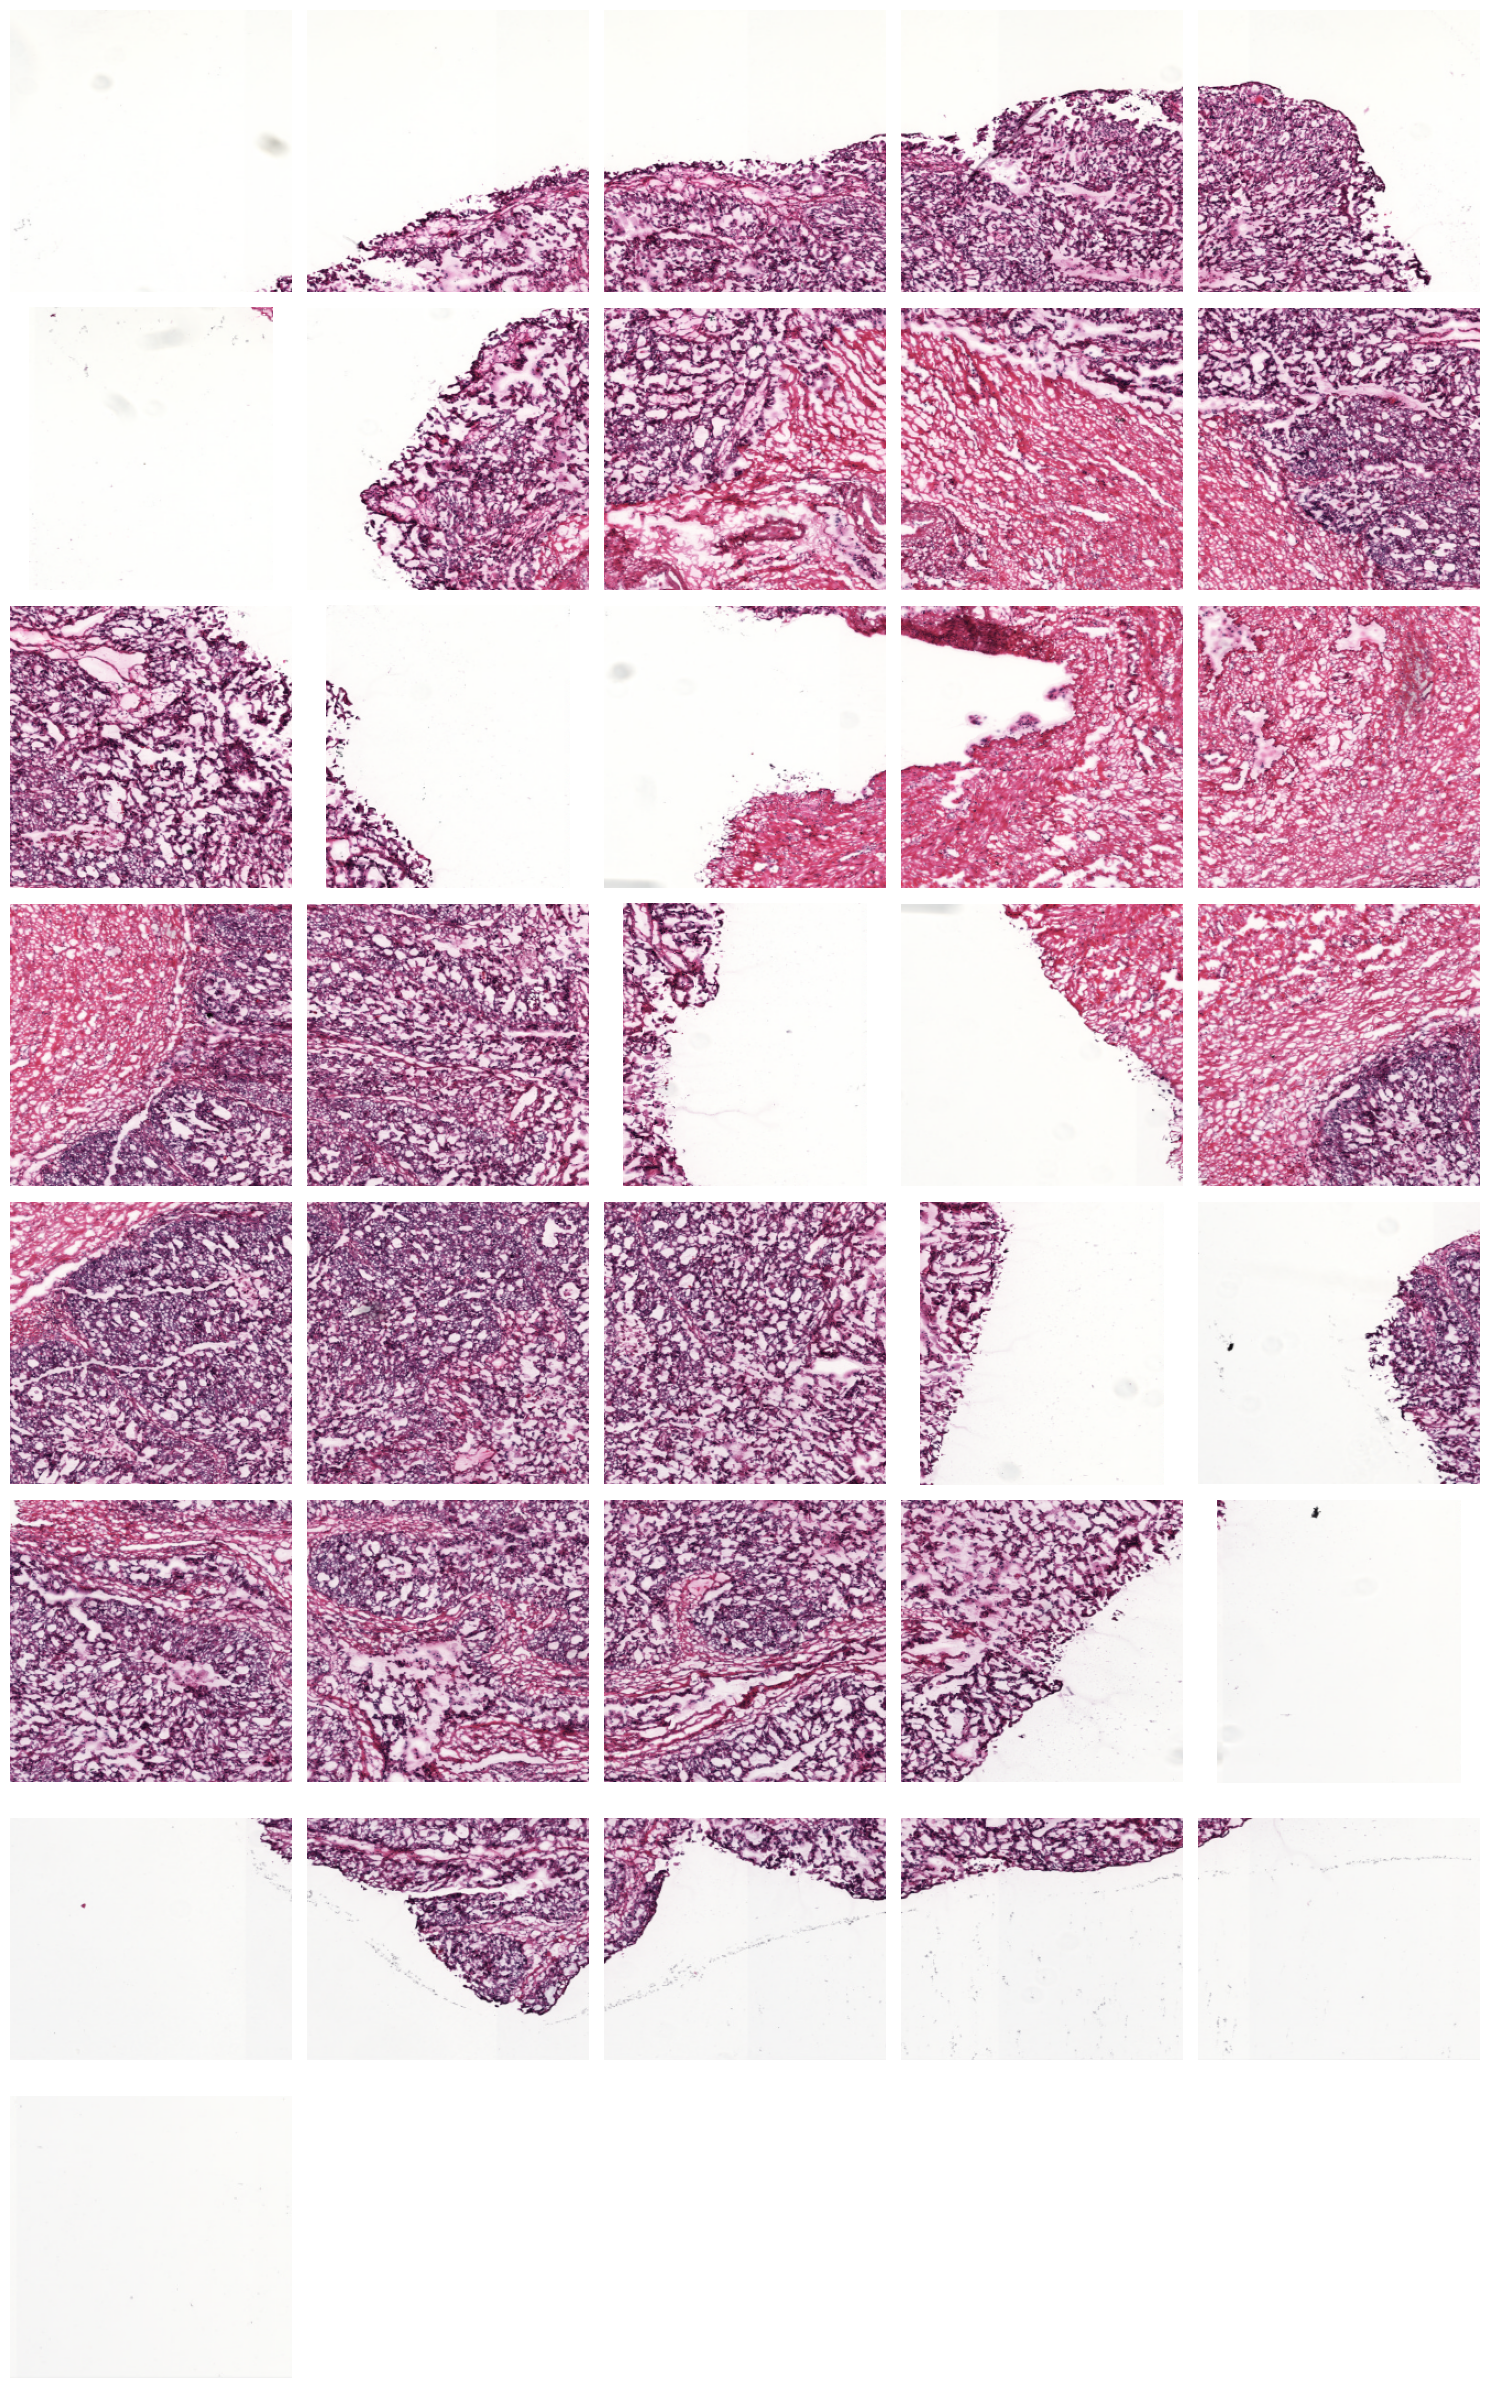

In [22]:
num_tiles = len(tiles)
cols = 5
rows = num_tiles // cols + (num_tiles % cols > 0)
fig, axes = plt.subplots(rows, cols, figsize=(15, 3 * rows))
axes = axes.flatten()

for i, tile in enumerate(tiles):
    axes[i].imshow(tile)
    axes[i].axis('off')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [23]:
tile_dir = "images/saved_tiles/"
os.makedirs(tile_dir, exist_ok=True)

for i, tile in enumerate(tiles):
    tile_name = f"tile_{i}.png" #other extensions can also be used
    imageio.imwrite(os.path.join(tile_dir, tile_name), tile)

In [28]:
tile_dir = "images/saved_tiles/"

tile_dimensions = []
tile_info = []

for filename in os.listdir(tile_dir):
    if filename.endswith(".png"):
        img_path = os.path.join(tile_dir, filename)
        with Image.open(img_path) as img:
            width, height = img.size
            channels = len(img.getbands())  # Number of channels
            tile_info.append((filename, width, height, channels))
            print(f"Image: {filename}, Width: {width}, Height: {height}, Channels: {channels}")

Image: tile_1.png, Width: 256, Height: 256, Channels: 4
Image: tile_2.png, Width: 256, Height: 256, Channels: 4
Image: tile_21.png, Width: 256, Height: 256, Channels: 4
Image: tile_26.png, Width: 256, Height: 256, Channels: 4
Image: tile_32.png, Width: 256, Height: 220, Channels: 4
Image: tile_7.png, Width: 256, Height: 256, Channels: 4
Image: tile_10.png, Width: 256, Height: 256, Channels: 4
Image: tile_11.png, Width: 220, Height: 256, Channels: 4
Image: tile_35.png, Width: 220, Height: 220, Channels: 4
Image: tile_12.png, Width: 256, Height: 256, Channels: 4
Image: tile_0.png, Width: 256, Height: 256, Channels: 4
Image: tile_29.png, Width: 220, Height: 256, Channels: 4
Image: tile_22.png, Width: 256, Height: 256, Channels: 4
Image: tile_33.png, Width: 256, Height: 220, Channels: 4
Image: tile_18.png, Width: 256, Height: 256, Channels: 4
Image: tile_25.png, Width: 256, Height: 256, Channels: 4
Image: tile_28.png, Width: 256, Height: 256, Channels: 4
Image: tile_23.png, Width: 220, Hei